In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib
%matplotlib inline

In [2]:
import numpy as np

In [3]:
database_url = 'https://www.kaggle.com/harlfoxem/housesalesprediction/code?datasetId=128&sortBy=voteCount'


In [4]:
def rmse(predicted,target):
    return np.sqrt(np.mean(np.square(predicted-target)))

In [5]:
raw_df = pd.read_csv('./kc_house_data.csv')
raw_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
raw_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
raw_df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [9]:
df = raw_df.copy()

In [10]:
df[df.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


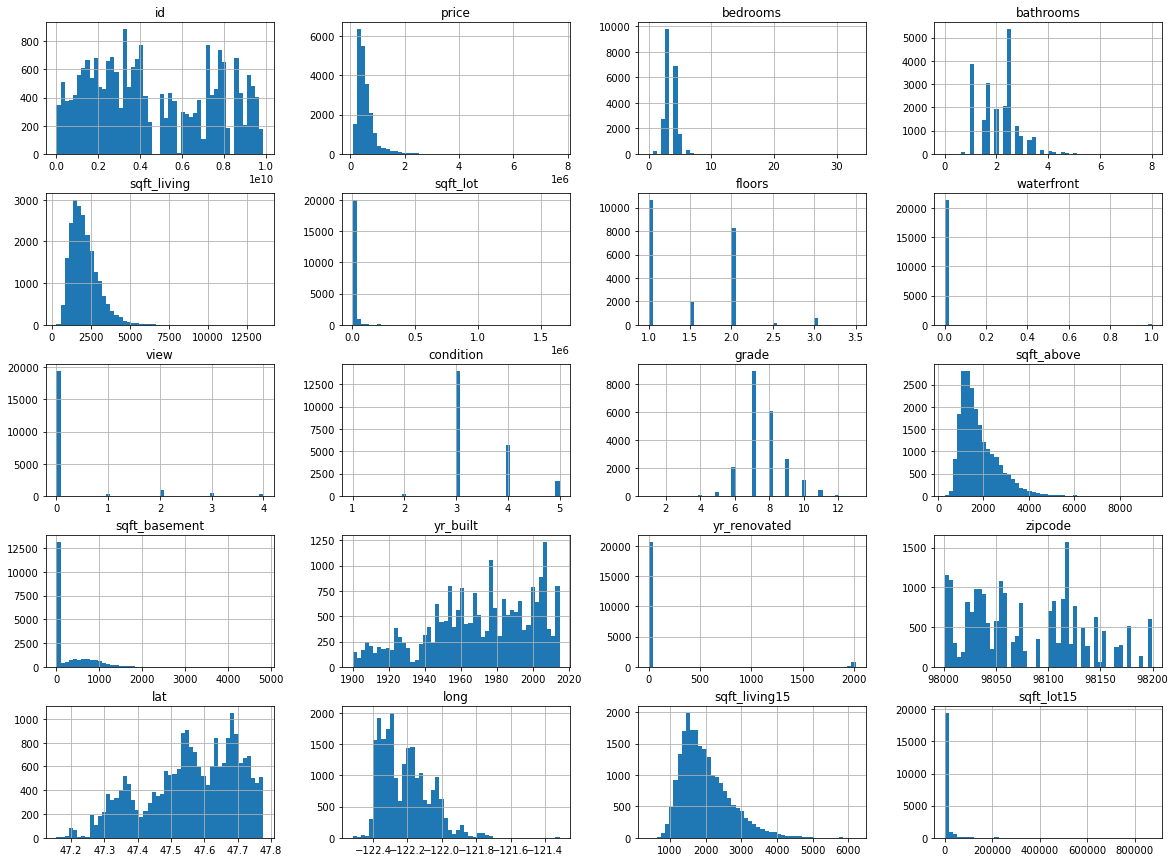

In [11]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [12]:
df.set_index('id',drop=True)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


In [13]:
pd.set_option('display.max_columns',50)
df[df.id == 6021501535]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,20140725T000000,430000.0,3,1.5,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.687,-122.386,1570,4500
94,6021501535,20141223T000000,700000.0,3,1.5,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.687,-122.386,1570,4500


In [14]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [15]:
df.yr_renovated.value_counts()

0       20699
2014       91
2013       37
2003       36
2007       35
        ...  
1948        1
1954        1
1951        1
1944        1
1959        1
Name: yr_renovated, Length: 70, dtype: int64

In [16]:
df.waterfront.value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [17]:
df.drop(labels=['id','date','zipcode','yr_renovated'],axis=1,inplace=True)

In [18]:
df['yr_built'] = df.yr_built.apply(lambda x:2021-x)

In [19]:
df.waterfront.value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [20]:
df.drop(labels=['waterfront'],axis=1,inplace=True)

In [21]:
df.grade.value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

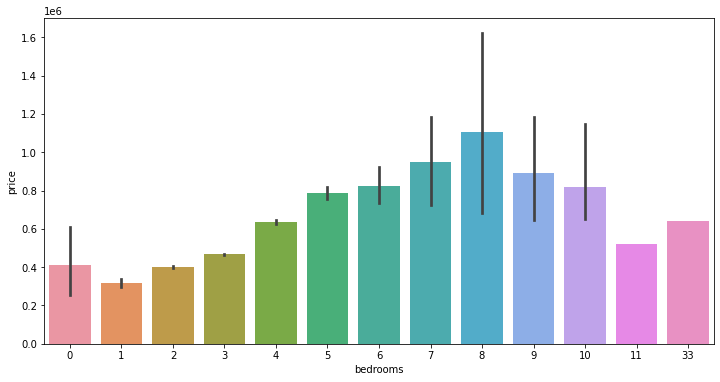

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x='bedrooms',y='price')

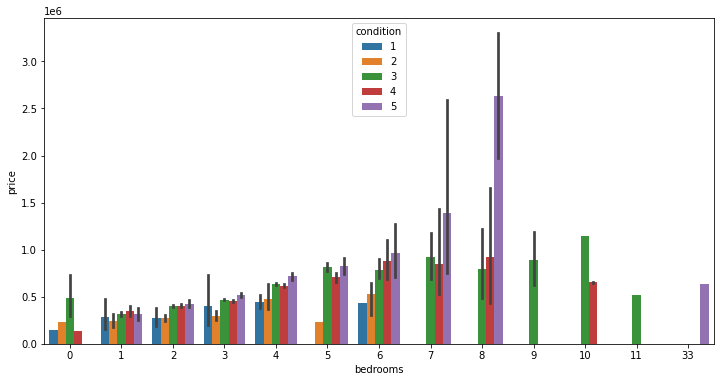

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x='bedrooms',y='price',hue='condition')
plt.show()

In [24]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [25]:
df.grade.value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [26]:
df.sqft_above

0        1180
1        2170
2         770
3        1050
4        1680
         ... 
21608    1530
21609    2310
21610    1020
21611    1600
21612    1020
Name: sqft_above, Length: 21613, dtype: int64

In [27]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.397293,0.036362,0.667434,0.605567,0.323816,-0.054012,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,0.079532,0.028472,0.356967,0.477600,0.303093,-0.154178,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.187737,-0.124982,0.664983,0.685342,0.283770,-0.506019,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.284611,-0.058753,0.762704,0.876597,0.435043,-0.318049,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.074710,-0.008958,0.113621,0.183512,0.015286,-0.053080,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.029444,-0.263768,0.458183,0.523885,-0.245705,-0.489319,0.049614,0.125419,0.279885,-0.011269
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,1.000000,0.045990,0.251321,0.167649,0.276947,0.053440,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.045990,1.000000,-0.144674,-0.158214,0.174105,0.361417,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.251321,-0.144674,1.000000,0.755923,0.168392,-0.446963,0.114084,0.198372,0.713202,0.119248
sqft_above,0.605567,0.477600,0.685342,0.876597,0.183512,0.523885,0.167649,-0.158214,0.755923,1.000000,-0.051943,-0.423898,-0.000816,0.343803,0.731870,0.194050


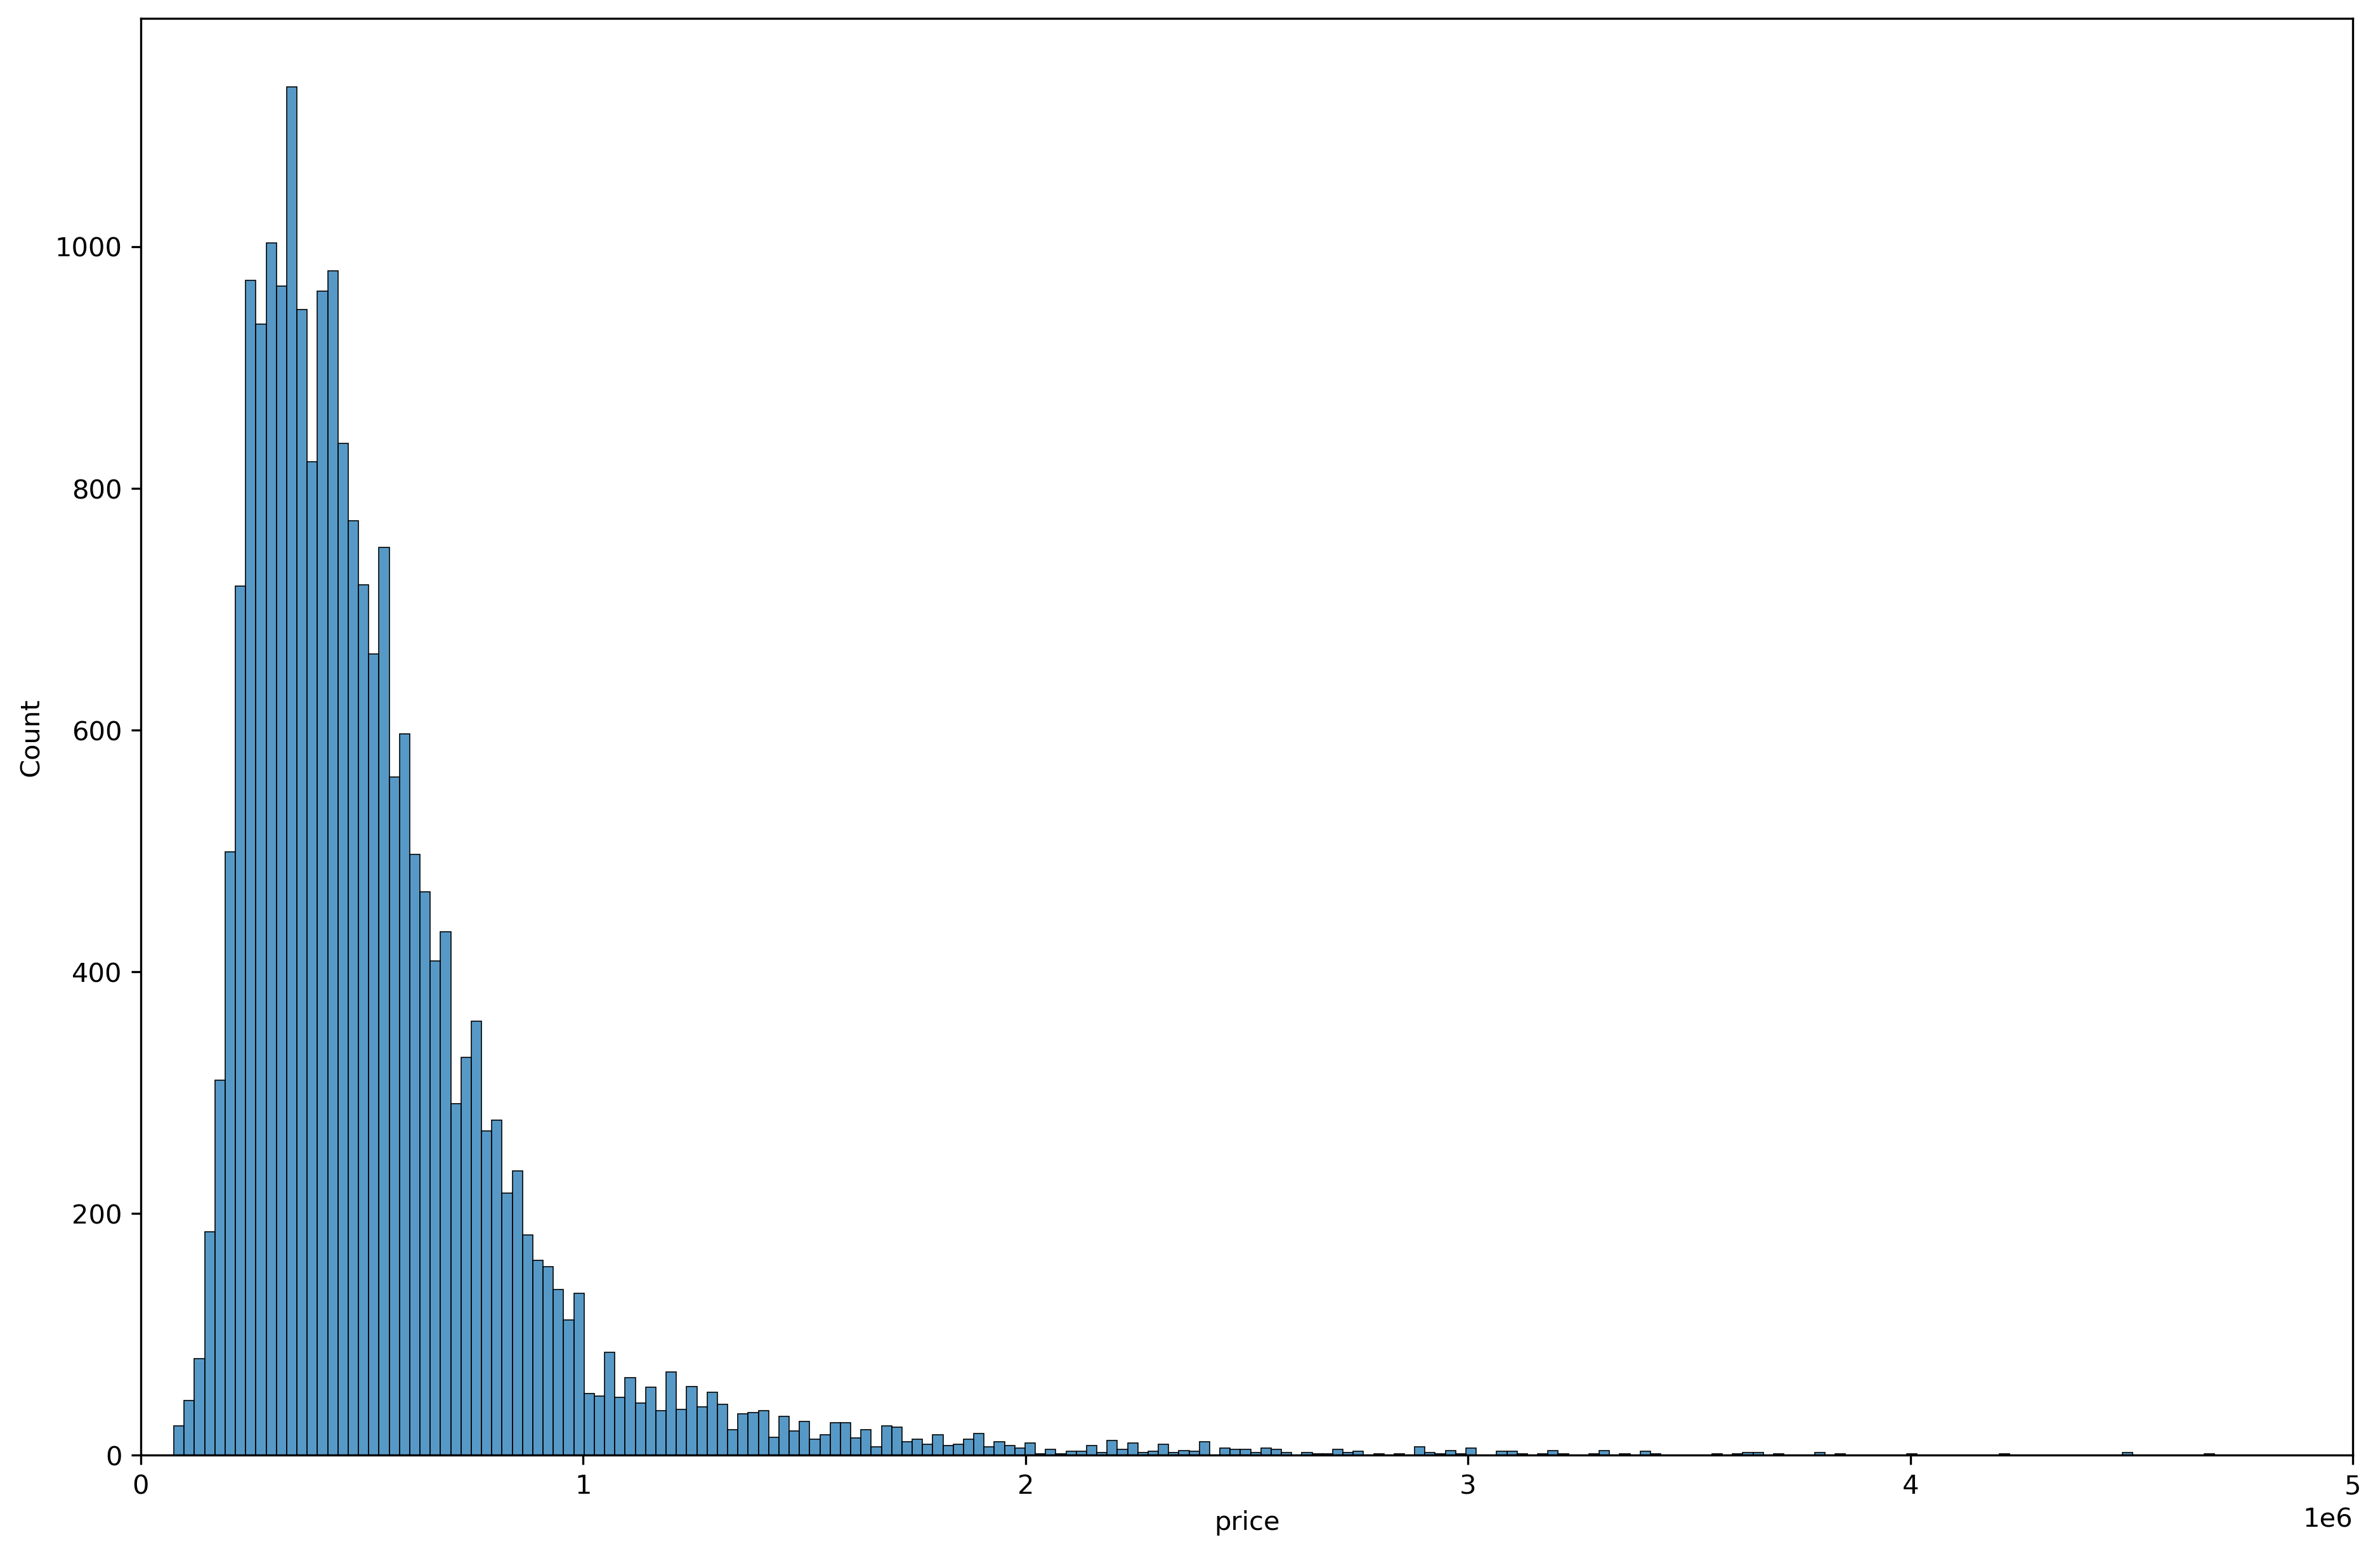

In [28]:
plt.figure(figsize=(15,10),dpi=300)
plt.xlim(0,5000000)
sns.histplot(data=df,x='price')
plt.show()

<AxesSubplot:xlabel='long', ylabel='lat'>

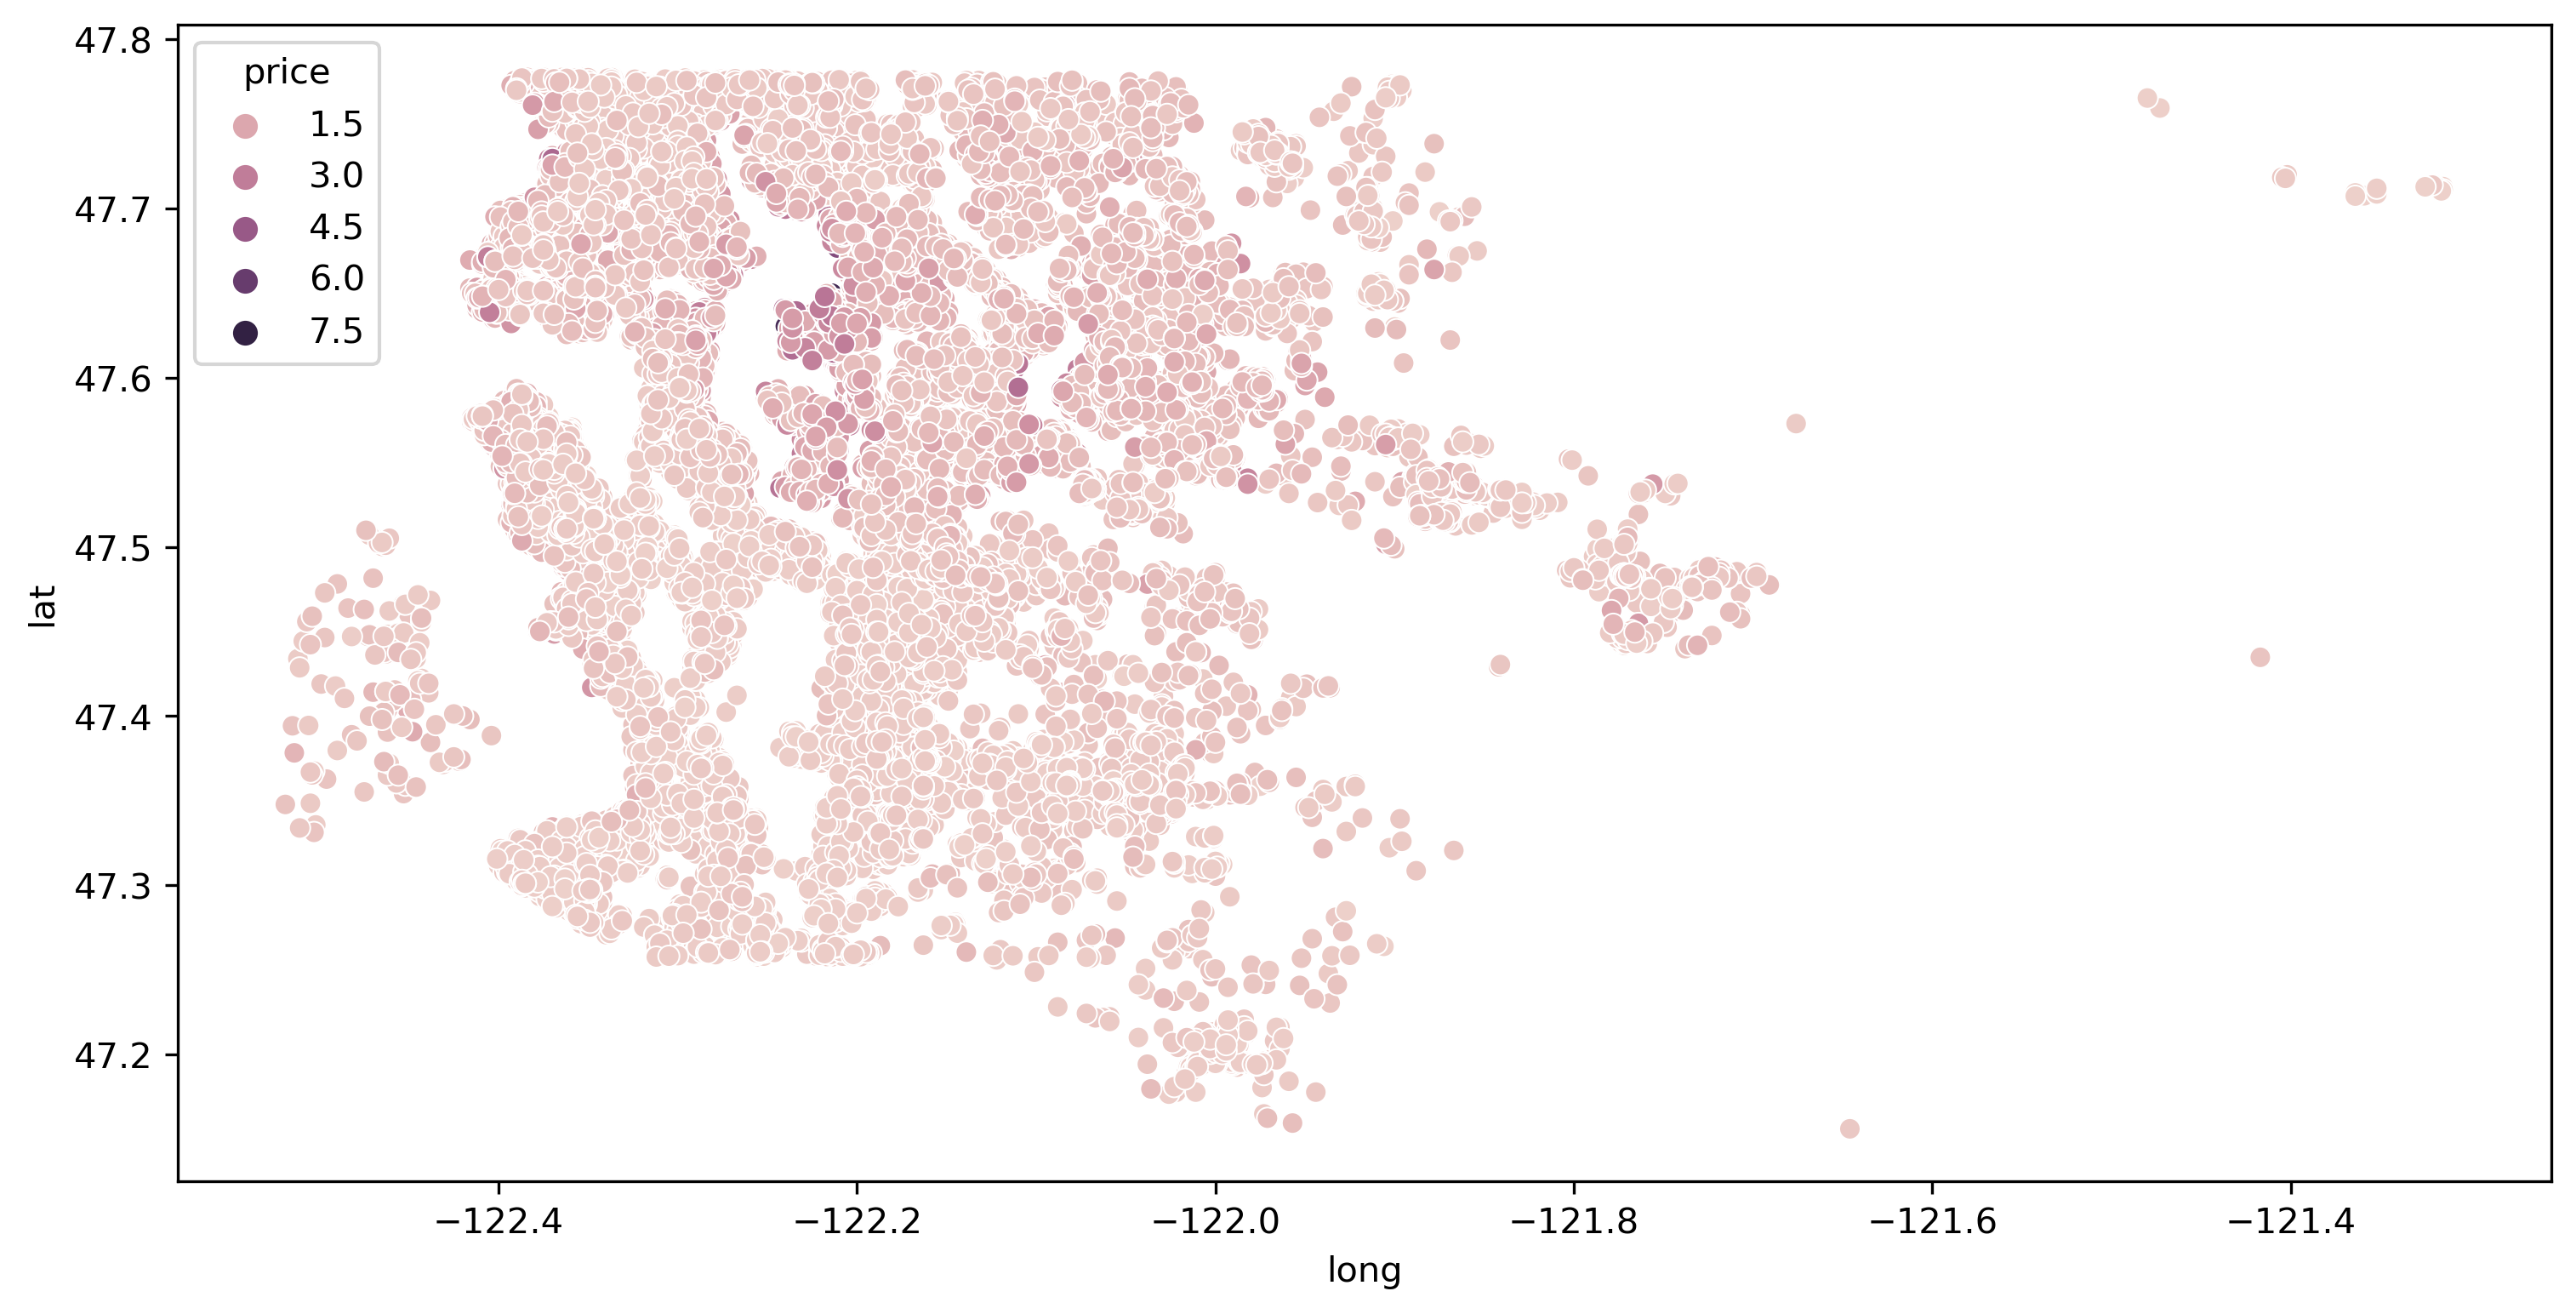

In [29]:
plt.figure(figsize=(12,6),dpi=300)
sns.scatterplot(data=df,x='long',y='lat',hue='price')

In [30]:
input_cols = df.columns[1:]
target_col = df.columns[0]

In [31]:
categorical_cols = ['floors','view','condition','grade']

In [32]:
numeric_cols = ['bedrooms','bathrooms','sqft_living', 'sqft_lot','sqft_above','sqft_basement','yr_built'
                ,'lat', 'long','sqft_living15', 'sqft_lot15']

In [33]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  lat            21613 non-null  float64
 13  long           21613 non-null  float64
 14  sqft_living15  21613 non-null  int64  
 15  sqft_lot15     21613 non-null  int64  
dtypes: float64(5), int64(11)
memory usage: 2.6 MB


In [35]:
#sns.pairplot(df)

In [36]:
from sklearn.model_selection import train_test_split

In [167]:
train_df, test_df = train_test_split(df,test_size=0.2,random_state=56)

In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 10963 to 2532
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          17290 non-null  float64
 1   bedrooms       17290 non-null  int64  
 2   bathrooms      17290 non-null  float64
 3   sqft_living    17290 non-null  int64  
 4   sqft_lot       17290 non-null  int64  
 5   floors         17290 non-null  float64
 6   view           17290 non-null  int64  
 7   condition      17290 non-null  int64  
 8   grade          17290 non-null  int64  
 9   sqft_above     17290 non-null  int64  
 10  sqft_basement  17290 non-null  int64  
 11  yr_built       17290 non-null  int64  
 12  lat            17290 non-null  float64
 13  long           17290 non-null  float64
 14  sqft_living15  17290 non-null  int64  
 15  sqft_lot15     17290 non-null  int64  
dtypes: float64(5), int64(11)
memory usage: 2.2 MB


In [39]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4323 entries, 4386 to 18185
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4323 non-null   float64
 1   bedrooms       4323 non-null   int64  
 2   bathrooms      4323 non-null   float64
 3   sqft_living    4323 non-null   int64  
 4   sqft_lot       4323 non-null   int64  
 5   floors         4323 non-null   float64
 6   view           4323 non-null   int64  
 7   condition      4323 non-null   int64  
 8   grade          4323 non-null   int64  
 9   sqft_above     4323 non-null   int64  
 10  sqft_basement  4323 non-null   int64  
 11  yr_built       4323 non-null   int64  
 12  lat            4323 non-null   float64
 13  long           4323 non-null   float64
 14  sqft_living15  4323 non-null   int64  
 15  sqft_lot15     4323 non-null   int64  
dtypes: float64(5), int64(11)
memory usage: 574.1 KB


In [40]:
train_inputs = train_df[input_cols].copy()
train_target = train_df[target_col].copy()

In [41]:
test_inputs = test_df[input_cols].copy()
test_target = test_df[target_col].copy()

In [42]:
#Standardization

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
numeric_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [45]:
categorical_cols

['floors', 'view', 'condition', 'grade']

In [46]:
scaler = StandardScaler().fit(train_df[numeric_cols+['price']])

In [48]:
train_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
10963,-0.205628,2.798840,1.472998,2.345863,0.188103,1.0,3,3,10,0.429240,4.079438,0.143509,-1.582029,-0.806688,2.015950,0.109219
4270,0.010025,1.732703,-1.456506,-0.430022,-0.283964,1.5,0,3,7,-0.124782,-0.661399,1.951786,0.828310,-0.792454,-1.109005,-0.300292
17128,-1.051963,-1.465707,-1.456506,-1.492665,-0.148591,1.0,0,5,6,-1.305089,-0.661399,0.962351,-0.565595,-0.892093,-1.109005,-0.139812
8497,-0.898700,-0.399570,-0.805505,-1.210739,-0.231131,1.0,0,3,7,-0.991946,-0.661399,-0.163557,-0.165793,-1.034435,-1.386455,-0.265058
18795,-0.192201,0.666567,0.821997,0.480815,-0.026896,2.0,0,3,8,0.886910,-0.661399,-0.880045,1.277818,1.840867,0.789332,0.040462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9338,-0.878356,-1.465707,-1.456506,-1.210739,-0.228498,1.0,0,3,6,-0.991946,-0.661399,0.689404,-0.215498,-0.450834,-1.415660,-0.261064
13730,-0.585394,-1.465707,-1.456506,-1.405918,-0.219098,1.0,0,3,7,-1.208737,-0.661399,0.791759,-0.038288,-0.422366,-1.503276,-0.246799
3264,0.041220,-0.399570,-0.480005,-0.538455,-0.301356,1.5,0,4,7,-0.726979,0.241618,2.156497,0.772122,-0.607410,-0.831556,-0.325256
399,-0.734859,0.666567,-0.480005,-0.603514,-0.154466,1.5,0,4,7,-0.317485,-0.661399,0.109390,-0.749288,0.403216,-0.875364,-0.148727


In [49]:
#OneHotEncoder

In [50]:
from sklearn import preprocessing

In [51]:
encod = preprocessing.OneHotEncoder().fit(train_df[categorical_cols])

In [52]:
feature_names = encod.get_feature_names(categorical_cols)

In [55]:
train_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
10963,-0.205628,2.798840,1.472998,2.345863,0.188103,0.429240,4.079438,0.143509,-1.582029,-0.806688,2.015950,0.109219,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4270,0.010025,1.732703,-1.456506,-0.430022,-0.283964,-0.124782,-0.661399,1.951786,0.828310,-0.792454,-1.109005,-0.300292,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
17128,-1.051963,-1.465707,-1.456506,-1.492665,-0.148591,-1.305089,-0.661399,0.962351,-0.565595,-0.892093,-1.109005,-0.139812,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8497,-0.898700,-0.399570,-0.805505,-1.210739,-0.231131,-0.991946,-0.661399,-0.163557,-0.165793,-1.034435,-1.386455,-0.265058,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
18795,-0.192201,0.666567,0.821997,0.480815,-0.026896,0.886910,-0.661399,-0.880045,1.277818,1.840867,0.789332,0.040462,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9338,-0.878356,-1.465707,-1.456506,-1.210739,-0.228498,-0.991946,-0.661399,0.689404,-0.215498,-0.450834,-1.415660,-0.261064,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13730,-0.585394,-1.465707,-1.456506,-1.405918,-0.219098,-1.208737,-0.661399,0.791759,-0.038288,-0.422366,-1.503276,-0.246799,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3264,0.041220,-0.399570,-0.480005,-0.538455,-0.301356,-0.726979,0.241618,2.156497,0.772122,-0.607410,-0.831556,-0.325256,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
399,-0.734859,0.666567,-0.480005,-0.603514,-0.154466,-0.317485,-0.661399,0.109390,-0.749288,0.403216,-0.875364,-0.148727,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
train_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'floors_1.0', 'floors_1.5', 'floors_2.0',
       'floors_2.5', 'floors_3.0', 'floors_3.5', 'view_0', 'view_1', 'view_2',
       'view_3', 'view_4', 'condition_1', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'grade_3', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'grade_12', 'grade_13'],
      dtype='object')

In [58]:
input_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'floors_1.0', 'floors_1.5', 'floors_2.0',
       'floors_2.5', 'floors_3.0', 'floors_3.5', 'view_0', 'view_1', 'view_2',
       'view_3', 'view_4', 'condition_1', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'grade_3', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'grade_12', 'grade_13']
target_col = ['price']

In [59]:
train_inputs = train_df[input_cols]
train_target = train_df[target_col]

In [60]:
model = LinearRegression().fit(train_inputs,train_target)

In [61]:
model.coef_

array([[-0.05664685,  0.10534701,  0.1772034 ,  0.01489996,  0.16062757,
         0.0678486 ,  0.17885406,  0.21160363, -0.03875703,  0.05804443,
        -0.02969   , -0.17486662, -0.1603583 , -0.15102262,  0.1498173 ,
        -0.01900205,  0.3554323 , -0.43313855, -0.13341097, -0.23929575,
        -0.01956638,  0.82541165, -0.1521182 , -0.04414793, -0.01883721,
         0.06306635,  0.15203698, -0.69579037, -1.23367289, -1.25737418,
        -1.18802001, -1.07124152, -0.9126871 , -0.61672757, -0.19094545,
         0.49508881,  1.69680678,  4.97456349]])

In [62]:
model.intercept_

array([1.4264808])

In [63]:
weights_df = pd.DataFrame({
    'feature':np.append(input_cols,1),
    'weights':np.append(model.coef_,model.intercept_)
})

In [64]:
weights_df

,feature,weights
0,bedrooms,-0.056647
1,bathrooms,0.105347
2,sqft_living,0.177203
3,sqft_lot,0.014900
4,sqft_above,0.160628
5,sqft_basement,0.067849
6,yr_built,0.178854
7,lat,0.211604
8,long,-0.038757
9,sqft_living15,0.058044


In [65]:
train_predictions = model.predict(train_df[input_cols])

In [66]:
LR_train_r_squared = model.score(train_df[input_cols],train_df[target_col])
LR_train_r_squared

0.7144082145205679

In [67]:
test_scaler = preprocessing.StandardScaler().fit(test_df[numeric_cols+['price']])

In [169]:
test_encoder = preprocessing.OneHotEncoder().fit(test_df[categorical_cols])
test_feature_names = test_encoder.get_feature_names(categorical_cols)

In [170]:
test_feature_names

array(['floors_1.0', 'floors_1.5', 'floors_2.0', 'floors_2.5',
       'floors_3.0', 'floors_3.5', 'view_0', 'view_1', 'view_2', 'view_3',
       'view_4', 'condition_1', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'grade_1', 'grade_3', 'grade_4',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       'grade_11', 'grade_12', 'grade_13'], dtype=object)

In [171]:
for i in test_feature_names:
    if i not in feature_names:
        print(i)

grade_1


In [172]:
test_df = test_df[test_df.grade != 1]

In [173]:
test_df[feature_names] = encod.transform(test_df[categorical_cols]).toarray()

In [174]:
test_df.drop(columns=categorical_cols,inplace=True)

In [175]:
for i in train_df.columns:
    if i not in test_df.columns:
        print(i)

floors
view
condition
grade


In [176]:
model.predict(test_df[input_cols])

array([[ 0.11997149],
       [ 0.07792425],
       [-0.60602408],
       ...,
       [-0.03887855],
       [ 1.4907452 ],
       [ 1.42081593]])

In [77]:
LR_test_r_squared = model.score(test_df[input_cols],test_df['price'])

In [78]:
#Polynomial_regression

In [79]:
train_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
10963,-0.205628,2.798840,1.472998,2.345863,0.188103,0.429240,4.079438,0.143509,-1.582029,-0.806688,2.015950,0.109219,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4270,0.010025,1.732703,-1.456506,-0.430022,-0.283964,-0.124782,-0.661399,1.951786,0.828310,-0.792454,-1.109005,-0.300292,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
17128,-1.051963,-1.465707,-1.456506,-1.492665,-0.148591,-1.305089,-0.661399,0.962351,-0.565595,-0.892093,-1.109005,-0.139812,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8497,-0.898700,-0.399570,-0.805505,-1.210739,-0.231131,-0.991946,-0.661399,-0.163557,-0.165793,-1.034435,-1.386455,-0.265058,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
18795,-0.192201,0.666567,0.821997,0.480815,-0.026896,0.886910,-0.661399,-0.880045,1.277818,1.840867,0.789332,0.040462,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9338,-0.878356,-1.465707,-1.456506,-1.210739,-0.228498,-0.991946,-0.661399,0.689404,-0.215498,-0.450834,-1.415660,-0.261064,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13730,-0.585394,-1.465707,-1.456506,-1.405918,-0.219098,-1.208737,-0.661399,0.791759,-0.038288,-0.422366,-1.503276,-0.246799,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3264,0.041220,-0.399570,-0.480005,-0.538455,-0.301356,-0.726979,0.241618,2.156497,0.772122,-0.607410,-0.831556,-0.325256,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
399,-0.734859,0.666567,-0.480005,-0.603514,-0.154466,-0.317485,-0.661399,0.109390,-0.749288,0.403216,-0.875364,-0.148727,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
test_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
4386,0.451003,-0.395644,-0.448580,-0.258372,0.036249,0.064076,-0.647840,0.749781,-0.399987,-1.204457,0.749177,-0.111132,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5648,-0.133612,-0.395644,0.515083,0.229146,0.152581,0.601448,-0.647840,-0.803748,-0.827593,0.892861,1.127353,0.437673,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9964,-0.560297,-0.395644,-1.412244,-1.033969,-0.141491,-0.790836,-0.647840,-0.229618,1.405707,1.005469,-1.243520,-0.101805,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7336,-0.435893,1.832848,1.799968,0.827463,-0.188697,1.260951,-0.647840,-0.837521,-0.250906,-0.915900,0.312820,-0.188242,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20923,1.695040,0.718602,1.157526,4.306569,-0.074226,3.886751,1.597400,-1.141472,-0.127278,2.427141,3.294592,0.027043,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12506,-0.144694,-0.395644,0.515083,-0.280532,-0.087881,0.039650,-0.647840,-0.567342,1.410798,0.512810,-0.050811,-0.135177,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10236,-0.629564,-0.395644,-0.769801,-1.011809,-0.299747,-0.766410,-0.647840,-0.601114,0.060345,1.392558,-1.199884,-0.355230,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10878,-0.324789,0.718602,-0.448580,0.362105,0.029517,-0.192398,1.098458,-0.263390,0.468317,1.167343,0.821903,0.018545,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11033,1.013451,-0.395644,0.836304,2.001938,-0.039937,2.555532,-0.647840,-0.466025,-0.093099,0.519848,1.229169,0.102619,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [81]:
from sklearn.preprocessing import PolynomialFeatures

In [82]:
#Only include degree 2 of numerical columns!

In [83]:
poly = PolynomialFeatures(degree=2)

In [85]:
train_set = poly.fit_transform(train_df[numeric_cols])

In [86]:
poly_num_cols = poly.get_feature_names(numeric_cols)

In [87]:
train_df_poly_num = train_df.copy() 

In [88]:
train_df_poly_num[poly_num_cols] = poly.fit_transform(train_df_poly_num[numeric_cols])

In [89]:
poly2_inputs = list(train_df_poly_num.columns)[1:]

In [90]:
Poly2_LR_model = LinearRegression().fit(train_df_poly_num[poly2_inputs],train_df_poly_num[target_col])

In [91]:
train_poly2_predictions = Poly2_LR_model.predict(train_df_poly_num[poly2_inputs])

In [92]:
train_r_squared_poly2_num_features = Poly2_LR_model.score(train_df_poly_num[poly2_inputs],train_df_poly_num[target_col])
print('For train set, R_squared for polynomical regression degree 2, considering numercial features is', train_r_squared_poly2_num_features)

For train set, R_squared for polynomical regression degree 2, considering numercial features is 0.785016107907957


In [93]:
train_rmse_poly2_num_features = rmse(train_poly2_predictions,train_df_poly_num[target_col]).loc['price']
print('For train set,RMSE for polynomical regression degree 2, considering only numerical features with degree 2 is', train_rmse_poly2_num_features)

For train set,RMSE for polynomical regression degree 2, considering only numerical features with degree 2 is 0.46366355484558414


In [94]:
#Test_evaluation

In [95]:
test_df_poly_num = test_df.copy()

In [96]:
test_df_poly_num[poly_num_cols] = poly.fit_transform(test_df_poly_num[numeric_cols])

In [97]:
test_poly2_numc_predictions = Poly2_LR_model.predict(test_df_poly_num[poly2_inputs])

In [98]:
test_r_squared_poly2_num_features = Poly2_LR_model.score(test_df_poly_num[poly2_inputs],test_df_poly_num[target_col])
print('For test set, R_squared for polynomical regression degree 2, considering numercial features is', test_r_squared_poly2_num_features)

For test set, R_squared for polynomical regression degree 2, considering numercial features is 0.769199793620505


In [99]:
test_rmse_poly2_num_features = rmse(test_poly2_numc_predictions,test_df_poly_num[target_col]).loc['price']
print('For test set,RMSE for polynomical regression degree 2, considering only numerical features with degree 2 is', test_rmse_poly2_num_features)

For test set,RMSE for polynomical regression degree 2, considering only numerical features with degree 2 is 0.48040561904481066


In [100]:
#include degree 2 of all columns!

In [101]:
poly2_all = PolynomialFeatures(degree=2)

In [102]:
train_all_set = poly2_all.fit_transform(train_df[input_cols]) 

In [103]:
poly_all_cols = poly2_all.get_feature_names(input_cols)

In [104]:
train_df_poly_all = train_df.copy()

In [105]:
train_df_poly_all[poly_all_cols] = poly2_all.fit_transform(train_df_poly_all[input_cols])

In [106]:
train_df_poly_all[poly_all_cols].shape

(17290, 780)

In [107]:
poly2_inputs_all = list(train_df_poly_all.columns)[1:]

In [108]:
Poly2_all_LR_model = LinearRegression().fit(train_df_poly_all[poly2_inputs_all],train_df_poly_all[target_col])

In [109]:
train_poly2_all_predictions = Poly2_all_LR_model.predict(train_df_poly_all[poly2_inputs_all])

In [110]:
train_r_squared_poly2_all_features = Poly2_all_LR_model.score(train_df_poly_all[poly2_inputs_all],train_df_poly_all[target_col])
print('R_squared for polynomical regression degree 2, considering all features is', train_r_squared_poly2_all_features)

R_squared for polynomical regression degree 2, considering all features is 0.8234594799296207


In [111]:
train_rmse_poly2_all_features = rmse(train_poly2_all_predictions,train_df_poly_all[target_col]).loc['price']
print('RMSE for polynomical regression degree 2, considering all features is', train_rmse_poly2_all_features)

RMSE for polynomical regression degree 2, considering all features is 0.4201672524964061


In [182]:
#Test set evaluation

In [216]:
new_test_df = test_df

In [214]:
test_df[numeric_cols+['price']] = scaler.transform(test_df[numeric_cols+['price']])

In [215]:
test_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,...,grade_7 grade_10,grade_7 grade_11,grade_7 grade_12,grade_7 grade_13,grade_8^2,grade_8 grade_9,grade_8 grade_10,grade_8 grade_11,grade_8 grade_12,grade_8 grade_13,grade_9^2,grade_9 grade_10,grade_9 grade_11,grade_9 grade_12,grade_9 grade_13,grade_10^2,grade_10 grade_11,grade_10 grade_12,grade_10 grade_13,grade_11^2,grade_11 grade_12,grade_11 grade_13,grade_12^2,grade_12 grade_13,grade_13^2
4386,-1.466991,-4.019790,-3.342560,-2.262819,-0.360110,-2.160132,-0.662861,-1.673306,-345.483971,861.232760,-2.904031,-0.460777,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5648,-1.466993,-4.019790,-2.087868,-2.262290,-0.360108,-2.159485,-0.662861,-1.726310,-348.564299,876.159553,-2.903479,-0.460758,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9964,-1.466994,-4.019790,-4.597251,-2.263660,-0.360115,-2.161162,-0.662861,-1.706721,-332.476394,876.960992,-2.906941,-0.460777,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7336,-1.466994,-1.643913,-0.414947,-2.261642,-0.360116,-2.158690,-0.662861,-1.727462,-344.410047,863.286446,-2.904668,-0.460780,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20923,-1.466988,-2.831852,-1.251407,-2.257869,-0.360113,-2.155528,-0.657792,-1.737832,-343.519476,887.079154,-2.900314,-0.460772,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12506,-1.466993,-4.019790,-2.087868,-2.262843,-0.360113,-2.160161,-0.662861,-1.718244,-332.439723,873.454698,-2.905199,-0.460778,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10236,-1.466994,-4.019790,-3.760790,-2.263636,-0.360118,-2.161132,-0.662861,-1.719396,-342.167903,879.715937,-2.906877,-0.460786,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10878,-1.466993,-2.831852,-3.342560,-2.262146,-0.360111,-2.160441,-0.658919,-1.707874,-339.229018,878.113060,-2.903925,-0.460773,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11033,-1.466990,-4.019790,-1.669638,-2.260368,-0.360112,-2.157131,-0.662861,-1.714787,-343.273259,873.504788,-2.903330,-0.460770,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [217]:
train_df_poly_all

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
10963,465000.0,6,3.25,4250,23326,1.0,3,3,10,2150,2100,54,47.3400,-122.327,3370,15983
4270,544500.0,5,1.00,1690,3240,1.5,0,3,7,1690,0,107,47.6746,-122.325,1230,4500
17128,153000.0,2,1.00,710,9000,1.0,0,5,6,710,0,78,47.4811,-122.339,1230,9000
8497,209500.0,3,1.50,970,5488,1.0,0,3,7,970,0,45,47.5366,-122.359,1040,5488
18795,469950.0,4,2.75,2530,14178,2.0,0,3,8,2530,0,24,47.7370,-121.955,2530,14055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9338,217000.0,2,1.00,970,5600,1.0,0,3,6,970,0,70,47.5297,-122.277,1020,5600
13730,325000.0,2,1.00,790,6000,1.0,0,3,7,790,0,73,47.5543,-122.273,960,6000
3264,556000.0,3,1.75,1590,2500,1.5,0,4,7,1190,400,113,47.6668,-122.299,1420,3800
399,269900.0,4,1.75,1530,8750,1.5,0,4,7,1530,0,53,47.4556,-122.157,1390,8750
